# 연령별취업자수관계

- 국가통계포털 > <mark>행정구역(시도)/성/연령별 취업자/</mark> 데이터 다운로두
- 전처리하기
<br>
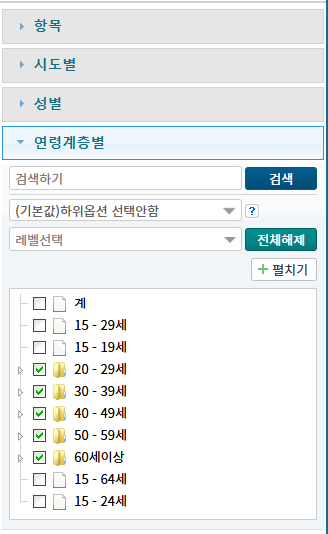
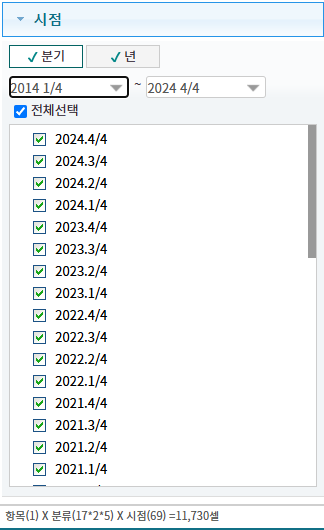
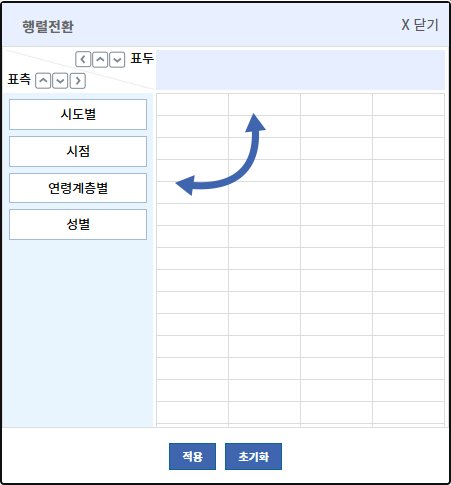

In [1]:
import pandas as pd
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

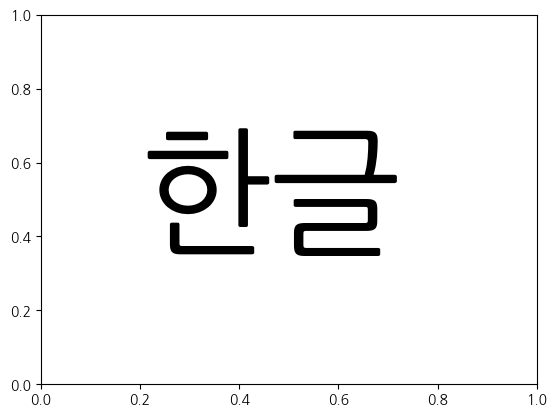

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothicLight.otf"
font_name = fm.FontProperties(fname = path).get_name()
rc("font", family = font_name)
plt.text(0.2, 0.4, "한글", size=100)

In [3]:
file_path="./ref/행정구역시도성연령별취업자_20250304.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [4]:
ex_data = ori.copy()
ex_data.columns = ["resion", "year", "age", "gender", "value"]
ex_data.loc[ex_data["resion"] == "세종특별자치시", "value"] = ex_data.loc[ex_data["resion"] == "세종특별자치시", "value"].replace('-',0)
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [5]:
ex_data["value"] = ex_data["value"].astype(int)
ex1_data = ex_data.groupby("year")["value"].sum().reset_index(name="total")
ex1_data

,year,total
0,2014.1/4,24955
1,2014.2/4,25866
2,2014.3/4,25969
3,2014.4/4,25847
4,2015.1/4,25295
5,2015.2/4,26114
6,2015.3/4,26214
7,2015.4/4,26148
8,2016.1/4,25502
9,2016.2/4,26320


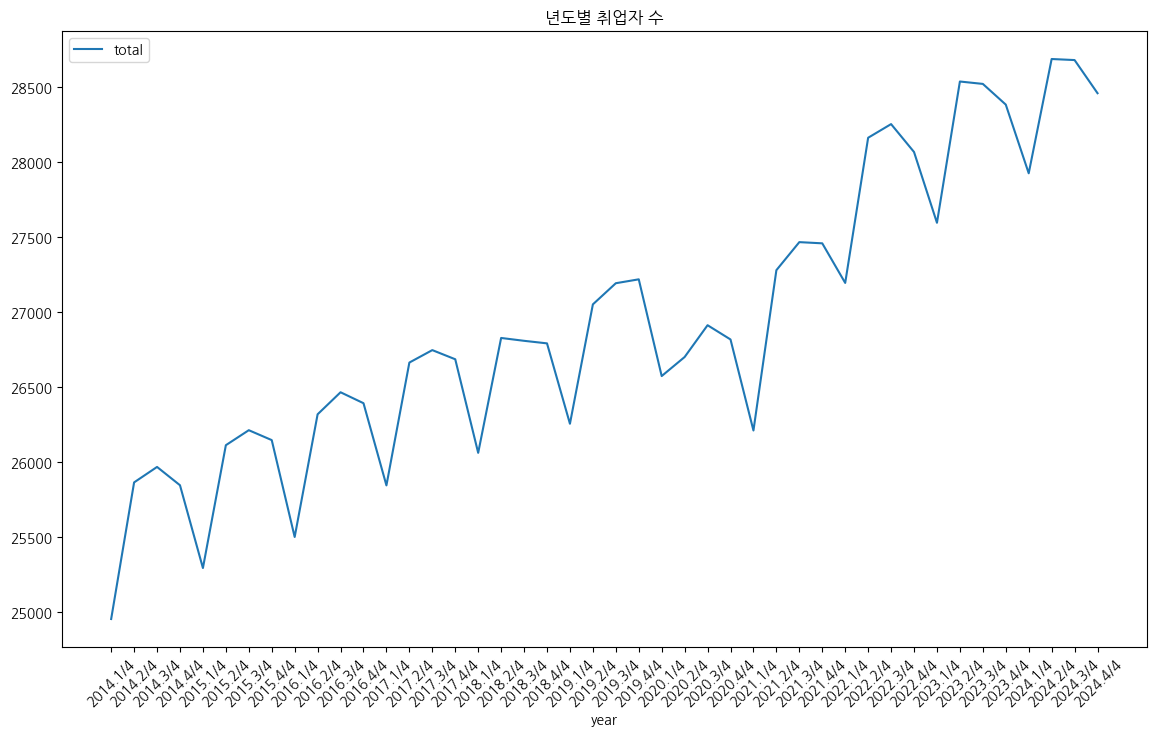

In [6]:
ax = ex1_data.plot(x="year", y="total", figsize=(14,8), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data["year"], rotation=45)
plt.show()

In [7]:
ex_data2 = ori.copy()
ex_data2.columns = ["resion", "year", "age", "gender", "value"]
ex_data2.loc[ex_data2["resion"] == "세종특별자치시", "value"] = ex_data2.loc[ex_data["resion"] == "세종특별자치시", "value"].replace('-',0)
ex_data2

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [8]:
ex_data2["value"] = ex_data2["value"].astype(int)
gen = ex_data2.groupby(["year", "gender"])["value"].sum().reset_index(name="total")
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [9]:
filter_m = gen["gender"]=="남자"
filter_f = gen["gender"]=="여자"
male = gen[filter_m]
female = gen[filter_f]
male

,year,gender,total
0,2014.1/4,남자,14650
2,2014.2/4,남자,15027
4,2014.3/4,남자,15088
6,2014.4/4,남자,15036
8,2015.1/4,남자,14793
10,2015.2/4,남자,15139
12,2015.3/4,남자,15156
14,2015.4/4,남자,15118
16,2016.1/4,남자,14818
18,2016.2/4,남자,15177


In [10]:
# M = male.plot(x="year", y="total", figsize=(10,5), title="년도별 남성 취업자 수")
# M.set_xticks(range(len(ex2_data)))
# M.set_xticklabels(male["year"], rotation=45)
# plt.show()

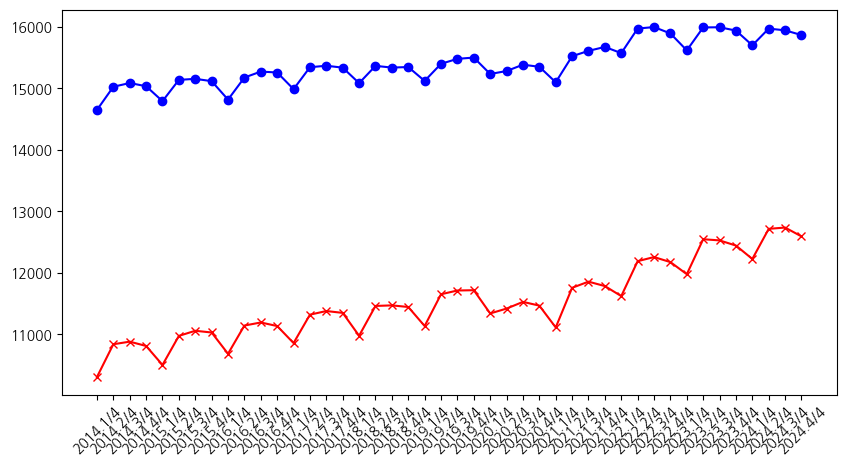

In [11]:
plt.figure(figsize=(10,5))
plt.plot(male["year"], male["total"], label="남자", color="blue", linestyle="-", marker="o")
plt.plot(female["year"], female["total"], label="여자", color="red", linestyle="-", marker="x")
plt.xticks(male["year"], rotation=45)
plt.show()

In [127]:
ex3_data = ori.copy()
ex3_data['데이터']=ex3_data['데이터'].replace('-',0)
ex3_data['데이터']=ex3_data['데이터'].fillna(0).astype(int)

In [128]:
filter0 = (ex3_data["시점"]>="2018.1/4") & (ex3_data["시점"]<="2018.4/4")
ex3_data = ex3_data[filter0] 
ex3_data.head()

,시도별,시점,연령계층별,성별,데이터
160,서울특별시,2018.1/4,20 - 29세,남자,339
161,서울특별시,2018.1/4,20 - 29세,여자,477
162,서울특별시,2018.1/4,30 - 39세,남자,693
163,서울특별시,2018.1/4,30 - 39세,여자,513
164,서울특별시,2018.1/4,40 - 49세,남자,719


In [129]:
x_data = ex3_data[ex3_data["연령계층별"].isin(["20 - 29세"])]
# x_data.loc[:, "데이터"] = x_data.loc[:, "데이터"].astype(int)
y_data = ex3_data[ex3_data["연령계층별"].isin(["60세이상"])]
# y_data.loc[:, "데이터"] = y_data.loc[:, "데이터"].astype(int)
z_data = ex3_data
# z_data.loc[:, "데이터"] = ex3_data.loc[:, "데이터"].astype(int)
x = x_data.groupby("시도별")["데이터"].sum()#.reset_index(name="total")  # 20대 취업자
y = y_data.groupby("시도별")["데이터"].sum()#.reset_index(name="total")  # 60대 취업자
z = z_data.groupby("시도별")["데이터"].sum()#.reset_index(name="total")  # 전체 취업자 수
z

시도별
강원도         3138
경기도        26883
경상남도        6948
경상북도        5677
광주광역시       2971
대구광역시       4874
대전광역시       3012
부산광역시       6593
서울특별시      20195
세종특별자치시      590
울산광역시       2287
인천광역시       6246
전라남도        3813
전라북도        3645
제주도         1480
충청남도        4677
충청북도        3466
Name: 데이터, dtype: int64

In [130]:
import numpy as np
regions = list(x.index)
color = [np.random.rand(3,) for _ in range(len(regions))]

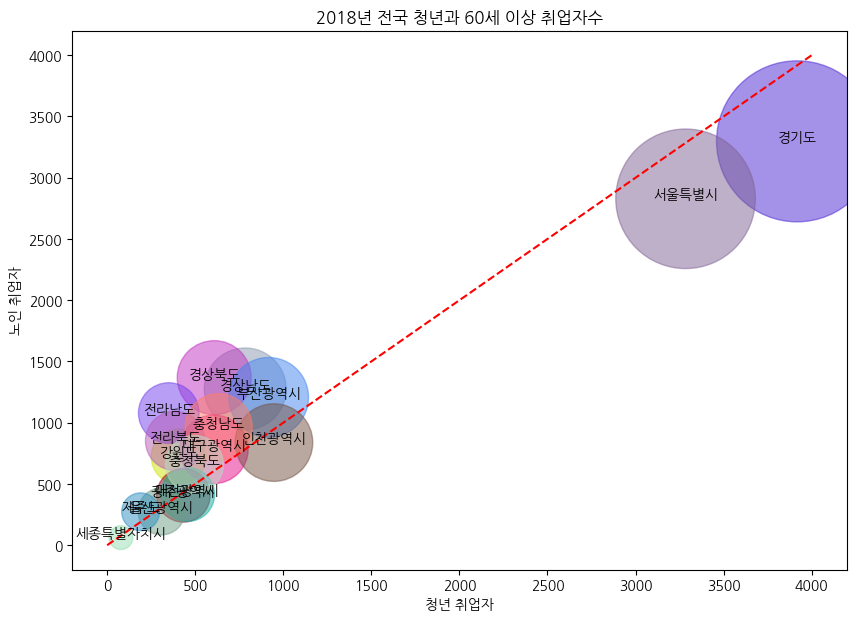

In [152]:
fig, ax = plt.subplots(figsize=(10,7))
# z = np.array(z, dtype=float)
scatter = ax.scatter(x, y, s=z*0.5, c=color, alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n], xy=(x.iloc[n], y.iloc[n]), ha="center")

ax.plot([0, 4000],[0, 4000], color="r", linestyle="--")

ax.set_title("2018년 전국 청년과 60세 이상 취업자수")
ax.set_xlabel("청년 취업자")
ax.set_ylabel("노인 취업자")
plt.show()

In [132]:
ex4_data = ori.copy()
ex4_data['데이터']=ex4_data['데이터'].replace('-',0)
ex4_data['데이터']=ex4_data['데이터'].fillna(0).astype(int)

In [133]:
filter1 = (ex4_data["시점"]>="2024.1/4") & (ex4_data["시점"]<="2024.4/4")
ex4_data = ex4_data[filter1] 
ex4_data.head()

,시도별,시점,연령계층별,성별,데이터
400,서울특별시,2024.1/4,20 - 29세,남자,366
401,서울특별시,2024.1/4,20 - 29세,여자,518
402,서울특별시,2024.1/4,30 - 39세,남자,635
403,서울특별시,2024.1/4,30 - 39세,여자,571
404,서울특별시,2024.1/4,40 - 49세,남자,617


In [150]:
x1_data = ex4_data[ex4_data["연령계층별"].isin(["20 - 29세"])]
y1_data = ex4_data[ex4_data["연령계층별"].isin(["60세이상"])]
z1_data = ex4_data
x1 = x1_data.groupby("시도별")["데이터"].sum()#.reset_index(name="total")  # 20대 취업자
y1 = y1_data.groupby("시도별")["데이터"].sum()#.reset_index(name="total")  # 60대 취업자
z1 = z1_data.groupby("시도별")["데이터"].sum()#.reset_index(name="total")  # 전체 취업자 수
x1

시도별
강원도         380
경기도        4169
경상남도        601
경상북도        563
광주광역시       374
대구광역시       531
대전광역시       453
부산광역시       876
서울특별시      3349
세종특별자치시      88
울산광역시       242
인천광역시       855
전라남도        353
전라북도        391
제주도         160
충청남도        594
충청북도        473
Name: 데이터, dtype: int64

In [138]:
import numpy as np
regions = list(x1.index)
color = [np.random.rand(3,) for _ in range(len(regions))]

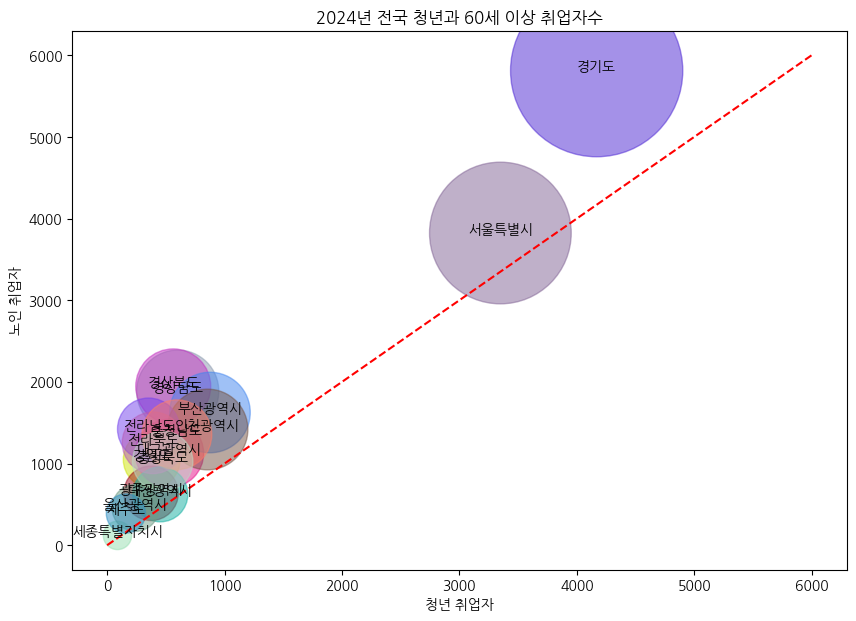

In [151]:
fig, ax = plt.subplots(figsize=(10,7))
# z = np.array(z, dtype=float)
scatter = ax.scatter(x1, y1, s=z1*0.5, c=color, alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n], xy=(x1.iloc[n], y1.iloc[n]), ha="center")

ax.plot([0, 6000],[0, 6000], color="r", linestyle="--")

ax.set_title("2024년 전국 청년과 60세 이상 취업자수")
ax.set_xlabel("청년 취업자")
ax.set_ylabel("노인 취업자")
plt.show()

In [154]:
from prophet import Prophet

In [167]:
ex4_data['시점']=ex4_data['시점'].replace('.','')
# ex4_data['시점']=ex4_data['시점'].replace('/','')
# ex4_data['시점']=ex4_data['시점'].fillna(0).astype(int)
ex4_data

,시도별,시점,연령계층별,성별,데이터
400,서울특별시,2024.1/4,20 - 29세,남자,366
401,서울특별시,2024.1/4,20 - 29세,여자,518
402,서울특별시,2024.1/4,30 - 39세,남자,635
403,서울특별시,2024.1/4,30 - 39세,여자,571
404,서울특별시,2024.1/4,40 - 49세,남자,617
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [163]:
ex4_data["시점"] = pd.to_datetime(ex4_data["시점"], format="%Y")
ex4_data = ex4_data.rename(columns={"시점":"ds", "total":"y"})
ex4_data.tail()

ValueError: unconverted data remains when parsing with format "%Y": ".1/4", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.